# Assignment 4

Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook. Please also make sure to only implement the function bodies and DON'T add any additional code outside functions since this might confuse the autograder.

So the function below is used to make it easy for you to create a data frame from a cloudant data frame using the so called "DataSource" which is some sort of a plugin which allows ApacheSpark to use different data sources.


In [4]:
#Please don't modify this function
def readDataFrameFromCloudant(database):
    cloudantdata=spark.read.load(database, "org.apache.bahir.cloudant")

    cloudantdata.createOrReplaceTempView("washing")
    spark.sql("SELECT * from washing").show()
    return cloudantdata

Sampling is one of the most important things when it comes to visualization because often the data set get so huge that you simply

- can't copy all data to a local Spark driver (Data Science Experience is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:

In [8]:
def getSample(df,spark):
    result = spark.sql('SELECT * FROM washing')
    return result.sample(False, 0.1, 42)

Now we want to create a histogram and boxplot. Please ignore the sampling for now and retur a python list containing all temperature values from the data set

In [16]:
def getListForHistogramAndBoxPlot(df,spark):
    results = spark.sql('SELECT temperature FROM washing WHERE temperature IS NOT NULL')
    results = results.rdd.map(lambda x: x.temperature).sample(False, 0.1, 42).collect()
    return results

Finally we want to create a run chart. Please return two lists (encapusalted in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refere to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm

In [78]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
from pyspark.sql.functions import struct
def getListsForRunChart(df,spark):
    results = spark.sql('SELECT temperature, ts FROM washing WHERE temperature IS NOT NULL ORDER BY ts').sample(False, 0.1, 42)
    # how to create a new column with the current columns as a tuple
    #results = results.withColumn("tuple",struct(results.temperature, results.ts)).select('tuple').rdd.map(lambda x: x.tuple).map(lambda x: (x.ts, x.temperature)).collect()
    temp = results.rdd.map(lambda x: x.temperature).collect()
    ts = results.rdd.map(lambda x: x.ts).collect()
    return (ts, temp)

### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED
#axx
### PLEASE DON'T REMOVE THIS BLOCK - THE FOLLOWING CODE IS NOT GRADED

Now it is time to connect to the cloudant database. Please have a look at the Video "Overview of end-to-end scenario" of Week 2 starting from 6:40 in order to learn how to obtain the credentials for the database. Please paste this credentials as strings into the below code

### TODO Please provide your Cloudant credentials here

In [6]:
hostname = "a5e87c2f-5325-4203-8451-4cd706836372-bluemix.cloudant.com"
user = "a5e87c2f-5325-4203-8451-4cd706836372-bluemix"
pw = "70ad69ef47f8064617b6c3c6e2774aa9f2f41e806b8be70e6ccba8d8575083a1"
database = "washing" #as long as you didn't change this in the NodeRED flow the database name stays the same

In [7]:
spark = SparkSession\
    .builder\
    .appName("Cloudant Spark SQL Example in Python using temp tables")\
    .config("cloudant.host",hostname)\
    .config("cloudant.username", user)\
    .config("cloudant.password",pw)\
    .getOrCreate()
cloudantdata=readDataFrameFromCloudant(database)

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0a8f916eca8914be2...|1-6dc81970ce12faf...|    7|      11|acceptable|     null|      77| null|         93|1533491155093|   null|
|0a8f916eca8914be2...|1-4d2b7411f1c318b...|   17|      11|acceptable|     null|      72| null|        100|1533491165121|   null|
|0a8f916eca8914be2...|1-747fed360db110e...|    4|    null|      null|     null|    null| 1062|       null|1533491168088|   null|
|0a8f916eca8914be2...|1-00ba40b50167df9...|   30|      11|acceptable|     null|      74| null|         95|1533491178143|   null|
|0a8f916eca8914be2...|1-d79f8910f07cc11...|   12|    null|      null|       64|    null| null|   

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

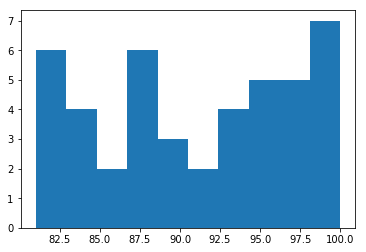

In [17]:
plt.hist(getListForHistogramAndBoxPlot(cloudantdata,spark))
plt.show()

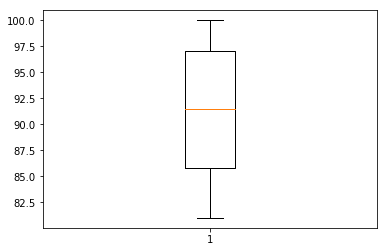

In [18]:
plt.boxplot(getListForHistogramAndBoxPlot(cloudantdata,spark))
plt.show()

In [79]:
lists = getListsForRunChart(cloudantdata,spark)

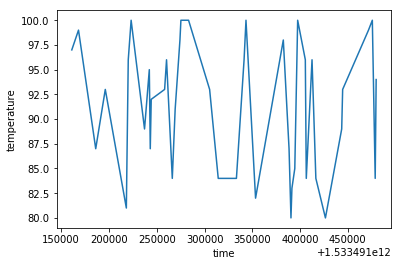

In [80]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

Congratulations, you are done! Please download the notebook as python file, name it assignment4.1.py and sumbit it to the grader.